## Convective areas histogram

In [2]:
import xarray
from datetime import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/rjackson/anaconda3/envs/pyart-2018/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
path = '/home/rjackson/data/conv_areas/*.nc'
areas_nc = xarray.open_mfdataset(path)
areas_nc

<xarray.Dataset>
Dimensions:     (time: 2956251)
Coordinates:
  * time        (time) datetime64[ns] 1998-12-06T06:04:01 ...
Data variables:
    areas       (time) float64 dask.array<shape=(2956251,), chunksize=(25553,)>
    dros_class  (time) float64 dask.array<shape=(2956251,), chunksize=(25553,)>
    mjo_index   (time) float64 dask.array<shape=(2956251,), chunksize=(25553,)>
Attributes:
    long_name:  Convective cell areas in square km

/home/rjackson/anaconda3/envs/pyart-2018/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater
/home/rjackson/anaconda3/envs/pyart-2018/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater


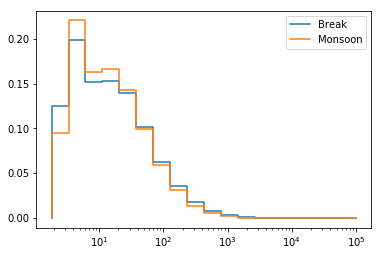

In [4]:
areas = areas_nc.areas.values
mjo_index = areas_nc.mjo_index.values
dros_class = areas_nc.dros_class.values
areas = np.ma.masked_where(areas == 1, areas)
hist_b, bins_b = np.histogram(areas[np.logical_and(areas > 1, dros_class == 0)], bins=np.logspace(0, 5, 20))
hist_m, bins_m = np.histogram(areas[np.logical_and(areas > 1, dros_class == 1)], bins=np.logspace(0, 5, 20))
fig, ax = plt.subplots(1,1)
ax.step(bins_b[1:], hist_b/np.sum(hist_b))
ax.step(bins_m[1:], hist_m/np.sum(hist_m))
ax.set_xscale('log')
ax.legend(['Break', 'Monsoon'])

/home/rjackson/anaconda3/envs/pyart-2018/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater
/home/rjackson/anaconda3/envs/pyart-2018/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater


13394
15095
9228
37163
63384
48589
44952
16736


(0, 25)

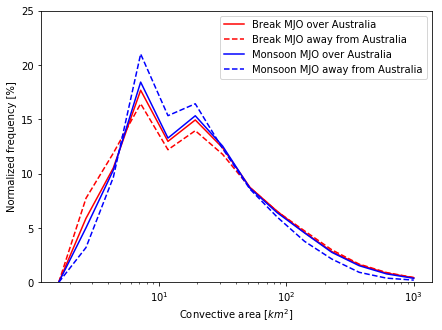

In [56]:
areas = areas_nc.areas.values
mjo_index = areas_nc.mjo_index.values
dros_class = areas_nc.dros_class.values
areas = np.ma.masked_where(areas == 1, areas)
hour = [int(np.datetime_as_string(x)[11:13]) for x in areas_nc.time.values]

hist_bins = np.logspace(0, 3, 15)
hist_b = np.zeros((8, len(hist_bins)-1))
hist_m = np.zeros((8, len(hist_bins)-1))
hist_bn = np.zeros((8, len(hist_bins)-1))
hist_mn = np.zeros((8, len(hist_bins)-1))
for mjo in range(1,9):
    inds_b = np.logical_and.reduce((areas > 1, mjo_index == mjo, dros_class == 0)) 
    inds_m = np.logical_and.reduce((areas > 1, mjo_index == mjo, dros_class == 1)) 
    print(np.sum(inds_m))
    hist_b[mjo-1], bins_b = np.histogram(areas[inds_b], bins=hist_bins)
    hist_m[mjo-1], bins_m = np.histogram(areas[inds_m], bins=hist_bins)
    hist_bn[mjo-1] = hist_b[mjo-1]/(np.sum(inds_b))*100
    hist_mn[mjo-1] = hist_m[mjo-1]/(np.sum(inds_m))*100

hist_b_mjo = np.sum(hist_b[3:6,:], axis=0)
hist_b_nmjo = np.sum(hist_b[[0,1,2,7],:], axis=0)
hist_m_mjo = np.sum(hist_m[3:6,:], axis=0)
hist_m_nmjo = np.sum(hist_m[[0,1,2,7],:], axis=0)

fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(hist_bins[1:], hist_b_mjo/np.sum(hist_b_mjo)*100, color='r', label='Break MJO over Australia')
ax.plot(hist_bins[1:], hist_b_nmjo/np.sum(hist_b_nmjo)*100, color='r', linestyle='--', label='Break MJO away from Australia')
ax.plot(hist_bins[1:], hist_m_mjo/np.sum(hist_m_mjo)*100, color='b', label='Monsoon MJO over Australia')
ax.plot(hist_bins[1:], hist_m_nmjo/np.sum(hist_m_nmjo)*100, color='b', linestyle='--', label='Monsoon MJO away from Australia')
ax.set_xscale('log')
ax.set_xlabel('Convective area [$km^2$]')
ax.set_ylabel('Normalized frequency [%]')
ax.legend()
ax.set_ylim([0, 25])

/home/rjackson/anaconda3/envs/pyart-2018/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater
/home/rjackson/anaconda3/envs/pyart-2018/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater


4569
4913
3264
15545
23328
20600
14293
3902


Text(0.5,1,'Night')

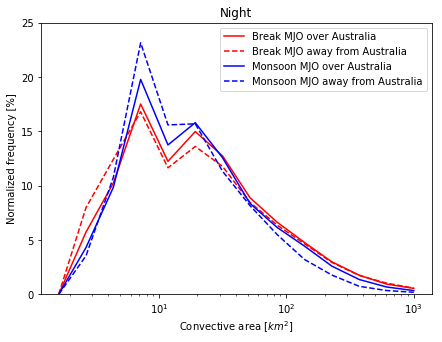

In [60]:
day_times = np.array([0,1,2,3,4,5,6,7,8,9,22,23])
night_times = range(10, 22)
hist_bins = np.logspace(0, 3, 15)
hist_b = np.zeros((8, len(hist_bins)-1))
hist_m = np.zeros((8, len(hist_bins)-1))
hist_bn = np.zeros((8, len(hist_bins)-1))
hist_mn = np.zeros((8, len(hist_bins)-1))
day_flag = np.array([x in day_times for x in hour])
for mjo in range(1,9):
    inds_b = np.logical_and.reduce((areas > 1, mjo_index == mjo, dros_class == 0, day_flag == False))
    inds_m = np.logical_and.reduce((areas > 1, mjo_index == mjo, dros_class == 1, day_flag == False))
    print(np.sum(inds_m))
    hist_b[mjo-1], bins_b = np.histogram(areas[inds_b], bins=hist_bins)
    hist_m[mjo-1], bins_m = np.histogram(areas[inds_m], bins=hist_bins)
    hist_bn[mjo-1] = hist_b[mjo-1]/(np.sum(inds_b))*100
    hist_mn[mjo-1] = hist_m[mjo-1]/(np.sum(inds_m))*100

hist_b_mjo = np.sum(hist_b[3:6,:], axis=0)
hist_b_nmjo = np.sum(hist_b[[0,1,2,7],:], axis=0)
hist_m_mjo = np.sum(hist_m[3:6,:], axis=0)
hist_m_nmjo = np.sum(hist_m[[0,1,2,7],:], axis=0)

fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(hist_bins[1:], hist_b_mjo/np.sum(hist_b_mjo)*100, color='r', label='Break MJO over Australia')
ax.plot(hist_bins[1:], hist_b_nmjo/np.sum(hist_b_nmjo)*100, color='r', linestyle='--', label='Break MJO away from Australia')
ax.plot(hist_bins[1:], hist_m_mjo/np.sum(hist_m_mjo)*100, color='b', label='Monsoon MJO over Australia')
ax.plot(hist_bins[1:], hist_m_nmjo/np.sum(hist_m_nmjo)*100, color='b', linestyle='--', label='Monsoon MJO away from Australia')
ax.set_xscale('log')
ax.set_xlabel('Convective area [$km^2$]')
ax.set_ylabel('Normalized frequency [%]')
ax.legend()
ax.set_ylim([0, 25])
ax.set_title('Night')

In [38]:
### MCS count

In [44]:
path = '/home/rjackson/data/mcs_count/*.nc'
mcs_nc = xarray.open_mfdataset(path)
mcs_nc

<xarray.Dataset>
Dimensions:     (time: 201882)
Coordinates:
  * time        (time) datetime64[ns] 1998-12-06T06:30:02 ...
Data variables:
    mcs_count   (time) float64 dask.array<shape=(201882,), chunksize=(0,)>
    dros_class  (time) float64 dask.array<shape=(201882,), chunksize=(0,)>
    mjo_index   (time) float64 dask.array<shape=(201882,), chunksize=(0,)>
Attributes:
    long_name:  Number of MCSes identified.

In [45]:
mcs_count = mcs_nc.mcs_count.values
dros_class_m = mcs_nc.dros_class.values
mjo_ind_m = mcs_nc.mjo_index.values

#hour = [x.astype(datetime).hour for x in mcs_nc.time.values]
print(str(np.sum(mcs_count[dros_class_m == 0])/(np.sum(dros_class_m == 0))) + 'MCSs/10 min')
print(str(np.sum(mcs_count[dros_class_m == 1])/(np.sum(dros_class_m == 1))) + 'MCSs/10 min')
print(str(np.sum(mcs_count[np.logical_or(mjo_ind_m < 4, mjo_ind_m == 8)])/(np.sum(np.logical_or(mjo_ind_m < 4, mjo_ind_m == 8)))) + 'MCSs/10 min')
print(str(np.sum(mcs_count[np.logical_and(mjo_ind_m > 3, mjo_ind_m < 8)])/(np.sum(np.logical_and(mjo_ind_m > 3, mjo_ind_m < 8)))) + 'MCSs/10 min')

0.1738173668862728MCSs/10 min
0.3022905553812363MCSs/10 min
0.1415038774909198MCSs/10 min
0.24467961390859402MCSs/10 min


In [61]:
day_times = np.array([0,1,2,3,4,5,6,7,8,9,22,23])
night_times = range(10, 22)
hour = [int(np.datetime_as_string(x)[11:13]) for x in mcs_nc.time.values]
day_flag = np.array([x in day_times for x in hour])
print(str(np.sum(mcs_count[np.logical_and(dros_class_m == 0, day_flag)])/(np.sum(np.logical_and(dros_class_m == 0, day_flag)))) + 'MCSs/10 min')
print(str(np.sum(mcs_count[np.logical_and(dros_class_m == 1, day_flag)])/(np.sum(np.logical_and(dros_class_m == 1, day_flag)))) + 'MCSs/10 min')
print(str(np.sum(mcs_count[np.logical_and(day_flag, np.logical_or(mjo_ind_m < 4, mjo_ind_m == 8))])/(np.sum([np.logical_and(day_flag, np.logical_or(mjo_ind_m < 4, mjo_ind_m == 8))]))) + 'MCSs/10 min')
print(str(np.sum(mcs_count[np.logical_and(mjo_ind_m > 3, day_flag, mjo_ind_m < 8)])/(np.sum(np.logical_and(mjo_ind_m > 3, day_flag, mjo_ind_m < 8)))) + 'MCSs/10 min')

0.16068119411868143MCSs/10 min
0.34192895967639997MCSs/10 min
0.1389175131262574MCSs/10 min
0.22624529975917868MCSs/10 min


In [62]:
print(str(np.sum(mcs_count[np.logical_and(dros_class_m == 0, ~day_flag)])/(np.sum(np.logical_and(dros_class_m == 0, ~day_flag)))) + 'MCSs/10 min')
print(str(np.sum(mcs_count[np.logical_and(dros_class_m == 1, ~day_flag)])/(np.sum(np.logical_and(dros_class_m == 1, ~day_flag)))) + 'MCSs/10 min')
print(str(np.sum(mcs_count[np.logical_and(~day_flag, np.logical_or(mjo_ind_m < 4, mjo_ind_m == 8))])/(np.sum([np.logical_and(~day_flag, np.logical_or(mjo_ind_m < 4, mjo_ind_m == 8))]))) + 'MCSs/10 min')
print(str(np.sum(mcs_count[np.logical_and(mjo_ind_m > 3, ~day_flag, mjo_ind_m < 8)])/(np.sum(np.logical_and(mjo_ind_m > 3, ~day_flag, mjo_ind_m < 8)))) + 'MCSs/10 min')

0.18690291720002694MCSs/10 min
0.26321036889332006MCSs/10 min
0.1440915116107811MCSs/10 min
0.24415814070986486MCSs/10 min


In [67]:
print(str(np.sum(mcs_count[day_flag])/(np.sum(day_flag))) + 'MCSs/10 min')
print(str(np.sum(mcs_count[~day_flag])/(np.sum(~day_flag))) + 'MCSs/10 min')

0.19612160888756633MCSs/10 min
0.20992015197839056MCSs/10 min
